# LGMVIP Internship- Let's Grow More
## Data Science Internship task 4
## Prediction Using Decision Tree Algorithm:

### Import library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score

### Loading Dataset

In [3]:
 df=pd.read_csv('Iris.csv')

In [4]:
 df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Dataset Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Finidng Null Values

In [6]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0    False          False         False          False         False    False
1    False          False         False          False         False    False
2    False          False         False          False         False    False
3    False          False         False          False         False    False
4    False          False         False          False         False    False
..     ...            ...           ...            ...           ...      ...
145  False          False         False          False         False    False
146  False          False         False          False         False    False
147  False          False         False          False         False    False
148  False          False         False          False         False    False
149  False          False         False          False         False    False

[

### Drop Id columns:

In [8]:
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### -Describe() is used to view some basic statistical details like percentile,mean,std etc. of a data frame of numeric values

In [9]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.shape

(150, 5)

In [13]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

<AxesSubplot:>

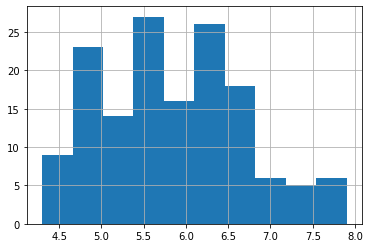

In [14]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

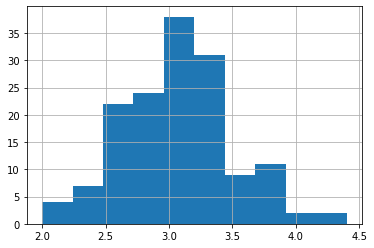

In [15]:
df['SepalWidthCm'].hist()

<AxesSubplot:>

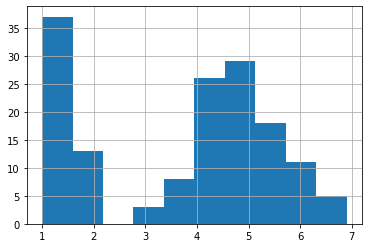

In [16]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

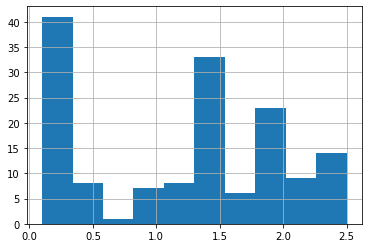

In [17]:
df['PetalWidthCm'].hist()

In [23]:
colors=['green','orange','blue']
species=['Iris-viriginca','Iris-versicolor','Iris-setosa']

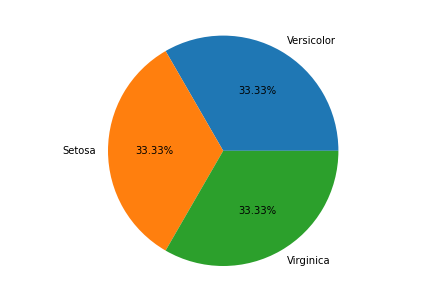

In [24]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.axis('equal')
l=['Versicolor','Setosa','Virginica']
s=[50,50,50]
ax.pie(s,labels=l,autopct='%1.2f%%')
plt.show()

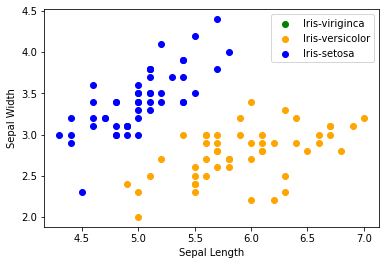

In [25]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

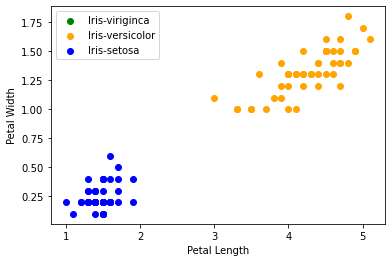

In [26]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c=colors[i],label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

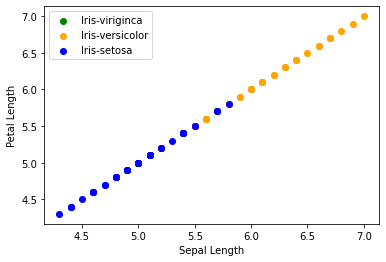

In [27]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalLengthCm'],c=colors[i],label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

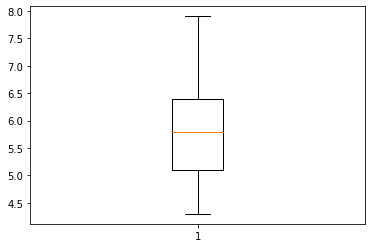

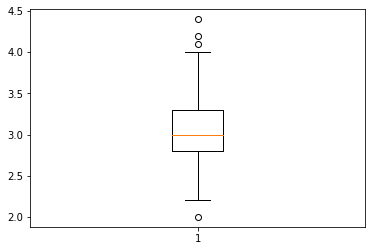

In [28]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([df['SepalLengthCm']])
plt.figure(2)
plt.boxplot([df['SepalWidthCm']])
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

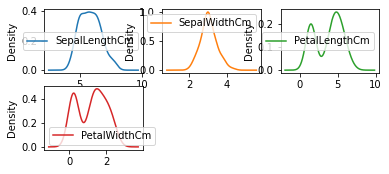

In [29]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False)

SepalLengthCm       AxesSubplot(0.125,0.536818;0.133621x0.343182)
SepalWidthCm     AxesSubplot(0.285345,0.536818;0.133621x0.343182)
PetalLengthCm     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
PetalWidthCm     AxesSubplot(0.606034,0.536818;0.133621x0.343182)
dtype: object

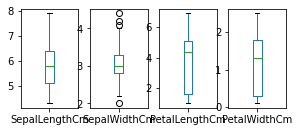

In [30]:
df.plot(kind='box',subplots=True,layout=(2,5),sharex=False)

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

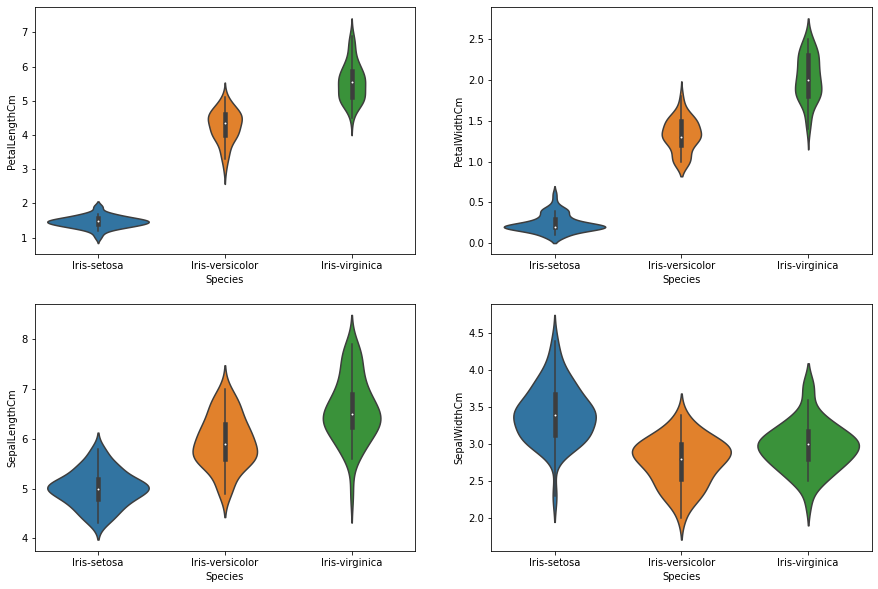

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

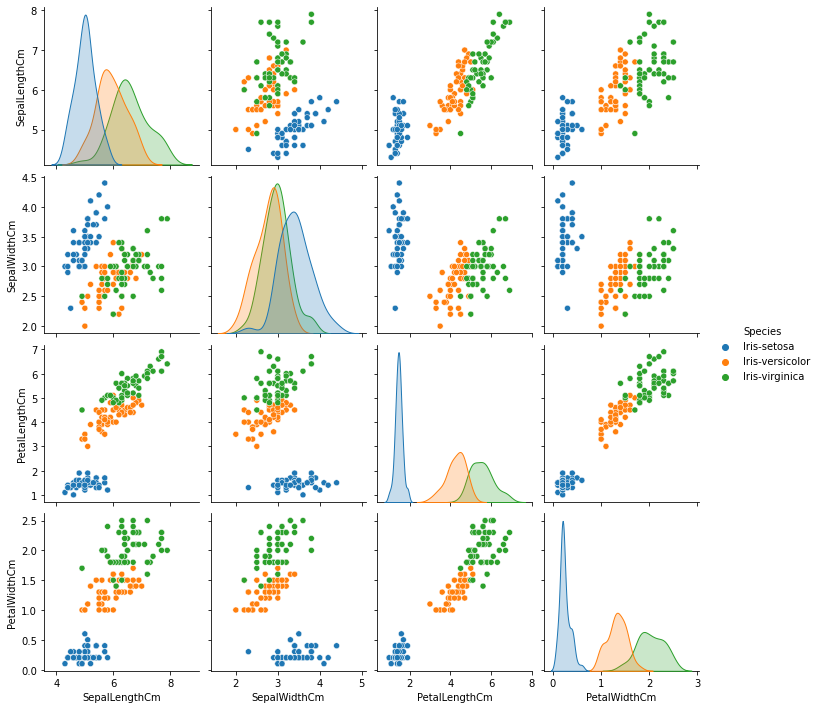

In [32]:
sns.pairplot(df,hue='Species')

In [33]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

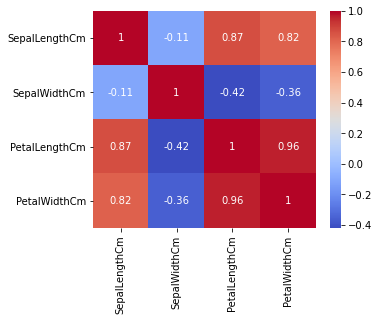

In [35]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [37]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Species'])
Y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30)

### Model Building Decision Tree :

In [40]:
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [41]:
clf

DecisionTreeClassifier()

In [42]:
y_pred=clf.predict(x_test)

In [43]:
y_pred

array([1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1,
       1])

In [44]:
y_test

63     1
140    2
14     0
144    2
85     1
39     0
109    2
36     0
149    2
134    2
136    2
13     0
58     1
42     0
113    2
38     0
43     0
81     1
66     1
45     0
19     0
83     1
98     1
18     0
11     0
121    2
4      0
116    2
123    2
68     1
147    2
28     0
92     1
17     0
89     1
91     1
72     1
142    2
34     0
54     1
130    2
145    2
41     0
53     1
62     1
Name: Species, dtype: int32

In [46]:
data_frame =pd.DataFrame({'Actual Data':y_test,"Predicted Data":y_pred})

In [47]:
data_frame.head()

,Actual Data,Predicted Data
63,1,1
140,2,2
14,0,0
144,2,2
85,1,1


In [48]:
data_frame.tail()

,Actual Data,Predicted Data
130,2,2
145,2,2
41,0,0
53,1,1
62,1,1


### Accuracy of the model:

In [50]:
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.9555555555555556


### Visualizing the decision tree:

In [51]:
col_names = ["Sepal length","Sepal width","Petal length","Petal width"]
target_names=["Setosa","Versicolor","Virginica"]

[Text(167.4, 195.696, 'Petal length <= 2.6\ngini = 0.666\nsamples = 105\nvalue = [34, 35, 36]\nclass = Virginica'),
 Text(141.64615384615385, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Setosa'),
 Text(193.15384615384616, 152.208, 'Petal width <= 1.75\ngini = 0.5\nsamples = 71\nvalue = [0, 35, 36]\nclass = Virginica'),
 Text(103.01538461538462, 108.72, 'Petal length <= 4.95\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]\nclass = Versicolor'),
 Text(51.50769230769231, 65.232, 'Petal width <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = Versicolor'),
 Text(25.753846153846155, 21.744, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = Versicolor'),
 Text(77.26153846153846, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(154.52307692307693, 65.232, 'Petal width <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Virginica'),
 Text(128.76923076923077, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\ncla

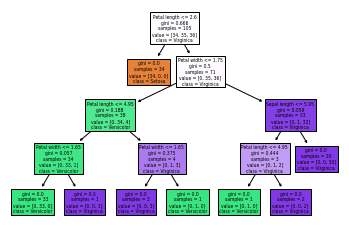

In [52]:
plot_tree(clf,feature_names=col_names,class_names=target_names,filled=True)

In [53]:
model=DecisionTreeClassifier().fit(X,Y)

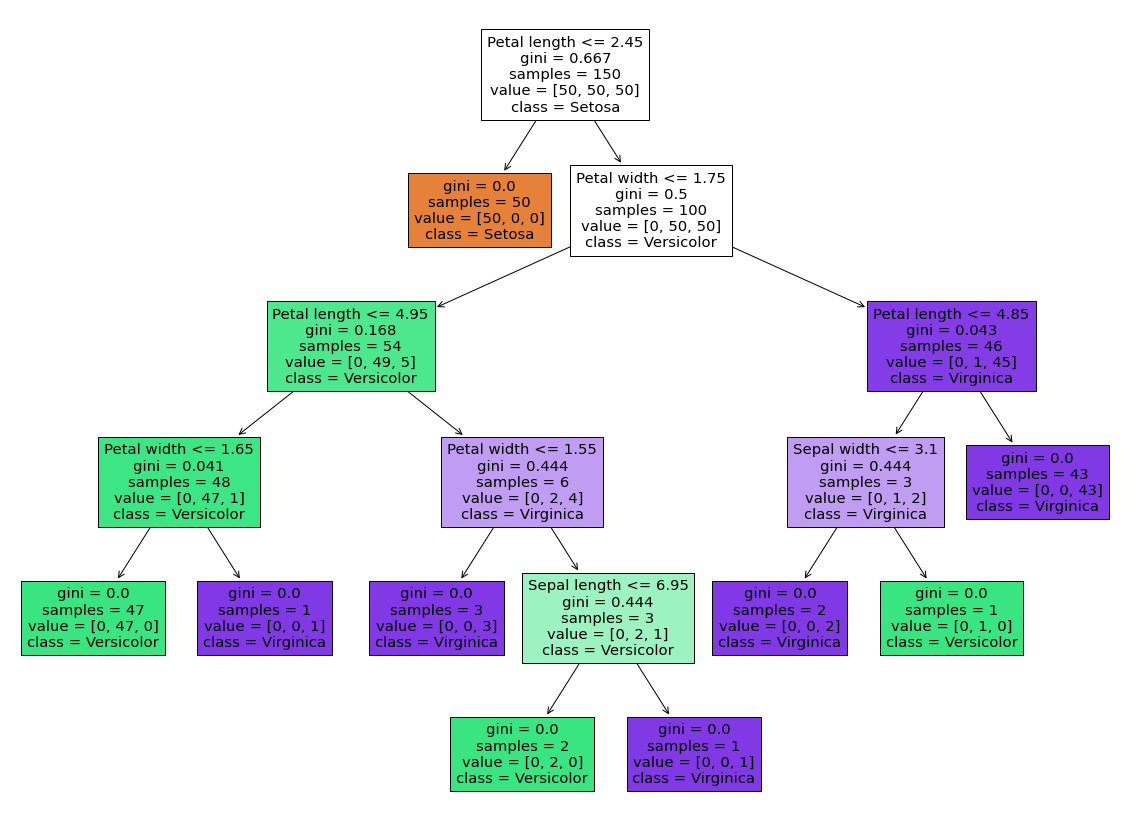

In [54]:
plt.figure(figsize=(20,15))
tree=tree.plot_tree(model,feature_names=col_names,class_names=target_names,filled=True)